<a href="https://colab.research.google.com/github/chuqasmi/GEN-AI-/blob/main/usman_recomd_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lightfm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808331 sha256=99f2181f0879512570fea46ec7d8d0771b000eface0379ec8953215ead062554
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


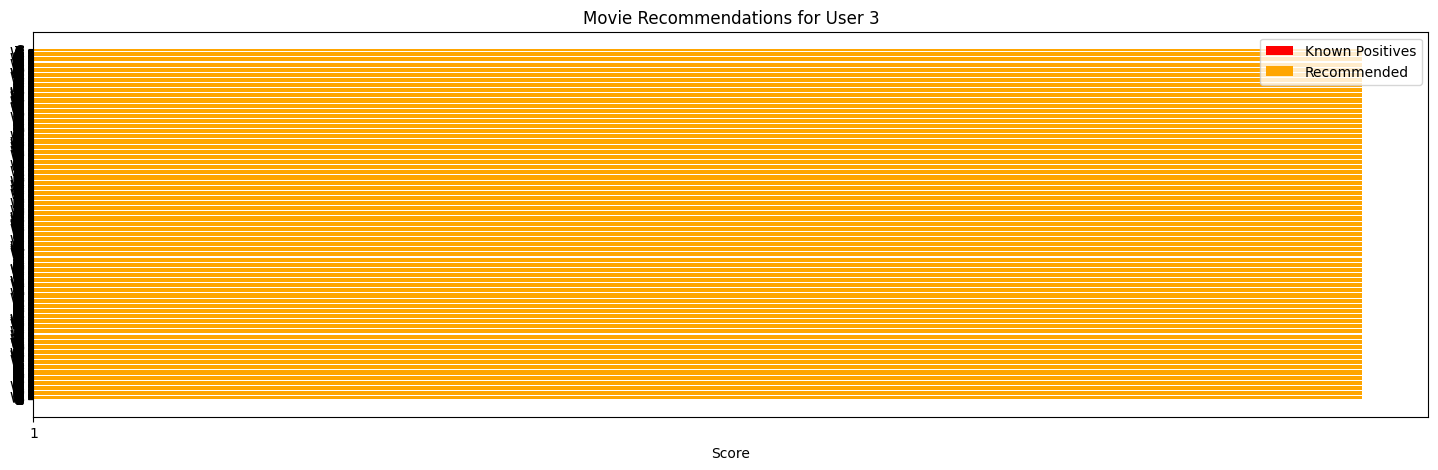

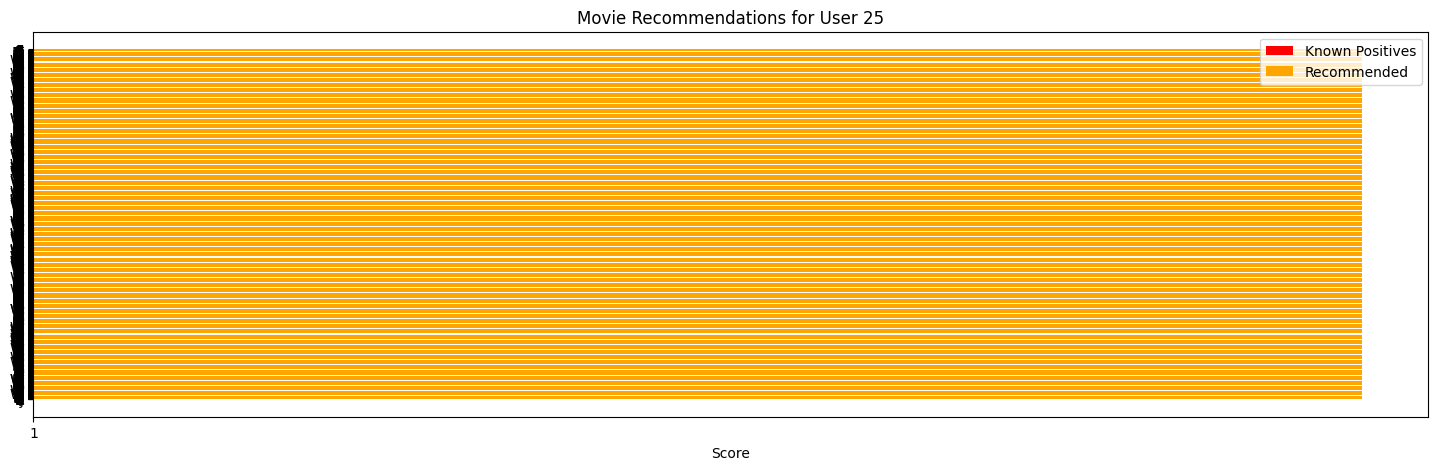

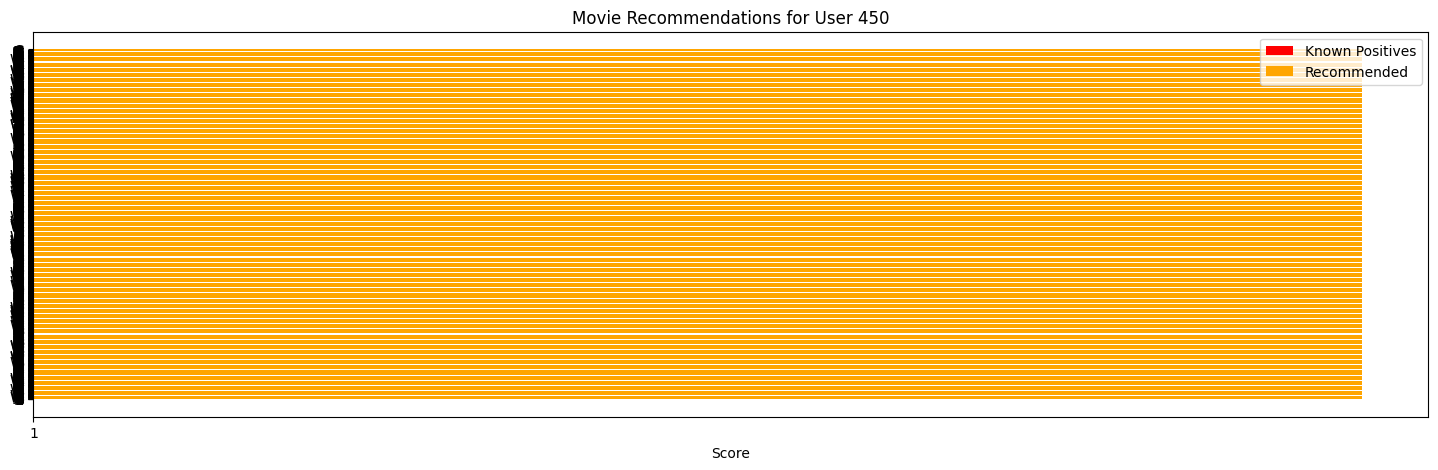

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lightfm.datasets import fetch_movielens
from lightfm import LightFM

# Step 1: Fetch and format the MovieLens dataset
def fetch_and_format_data():
    """
    Fetches the MovieLens dataset and formats it for training.
    Returns:
        data: Dictionary containing the formatted dataset.
    """
    data = fetch_movielens()
    return data

# Step 2: Create and train the recommendation model
def create_and_train_model(data, num_epochs=50):
    """
    Creates and trains the LightFM recommendation model.
    Args:
        data: Dictionary containing the formatted dataset.
        num_epochs: Number of epochs for model training.
    Returns:
        model: Trained LightFM model.
    """
    model = LightFM(loss='warp')  # Weighted Approximate-Rank Pairwise
    model.fit(data['train'], epochs=num_epochs, num_threads=2)
    return model

# Step 3: Generate recommendations for users
def generate_recommendations(model, data, user_ids):
    """
    Generates movie recommendations for specified user IDs.
    Args:
        model: Trained recommendation model.
        data: Dictionary containing the formatted dataset.
        user_ids: List of user IDs for generating recommendations.
    """
    n_users, n_items = data['train'].shape

    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]

        scores = model.predict(user_id, np.arange(n_items))
        top_items = data['item_labels'][np.argsort(-scores)]

        visualize_recommendations(known_positives, top_items, user_id)

# Step 4: Visualize recommendations
def visualize_recommendations(known_positives, top_items, user_id):
    """
    Visualizes movie recommendations for a specific user.
    Args:
        known_positives: Array of movies already liked by the user.
        top_items: Array of recommended movies for the user.
        user_id: ID of the user for whom recommendations are generated.
    """
    fig, ax = plt.subplots(figsize=(18, 5))

    ax.barh(np.arange(len(known_positives)), np.ones_like(known_positives), color='red', label='Known Positives')
    ax.barh(np.arange(len(top_items)), np.ones(len(top_items)) * 0.4, color='orange', label='Recommended')

    ax.set_xlabel('Score')
    ax.set_yticks(np.arange(len(top_items)))
    ax.set_yticklabels(top_items)
    ax.invert_yaxis()
    ax.legend()
    ax.set_title('Movie Recommendations for User {}'.format(user_id))

    plt.show()

# Main function
def main():
    # Step 1: Fetch and format the dataset
    data = fetch_and_format_data()

    # Step 2: Create and train the model
    model = create_and_train_model(data, num_epochs=100)

    # Step 3: Generate recommendations for specified users
    user_ids = [3, 25, 450]
    generate_recommendations(model, data, user_ids)

if __name__ == "__main__":
    main()
